# Clinical data overview 

Data that we will use came from patients suffering from hydrocephalus. Usually to detect differents sleeping stages we use EEG but this is a very invasive technique, it requires installation time and is very inconvinient for the patient. EEG is therefore not a suitable technique for the detection of sleep stages in patients with hydrocephalus. Indeed in order to monitor intracranial pressure patients already have a sensor in the cranium. Studies have shown that it is possible to detect sleep stages based on changes in arterial blood pressure (ABP). We will therefore calculate features from the ABP signal based on these studies to determine the sleep stages of our patients.

In [1]:
# Allow display of images
from IPython.display import display, Image

# Import the required modules
import numpy as np
import matplotlib.pyplot as plt
import glob

import pandas as pd

# Tools from brainsignal library
import os
import sys
path=r'C:\Users\Hamon\Documents\Stage\brainsignal'
sys.path.append(path)
import brainsignal.datageneration as dg
import brainsignal.datanalysis as da

# This makes the plots appear inside the notebook
%matplotlib inline


#### Load data

We load data stored in txt files.

In [2]:
rep='../../data/'
patientdir='ID_2'

file=glob.glob(rep+patientdir+'/WAVE_ICP*.txt', recursive=True)[0]

data=pd.read_csv(file,header=None, decimal=',', delimiter='\n')
data_array=np.array(data.values)
ICP_signal=data_array.transpose()[0]

In [3]:
fs=200
ICP_time=np.arange(len(ICP_signal))/fs

In [4]:
file=glob.glob(rep+patientdir+'/WAVE_ABP*.txt', recursive=True)[0]

data=pd.read_csv(file,header=None, decimal=',', delimiter='\n')
data_array=np.array(data.values)
ABP_signal=data_array.transpose()[0]

In [5]:
fs=200
ABP_time=np.arange(len(ABP_signal))/fs

#### Visualisation

Let's visalize our datas at different time scales.

In [6]:
# One hour time scale
time=6 #beginning of the visualisation window

(20.0, 250.0)

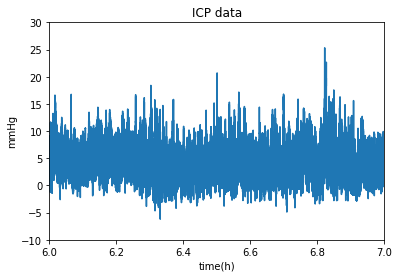

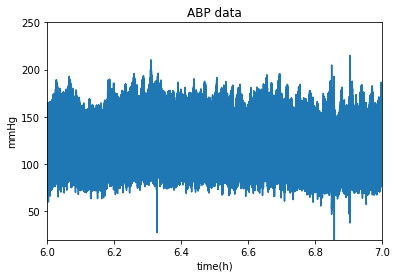

In [7]:
plt.plot(ICP_time/60/60,ICP_signal)

plt.title('ICP data')
plt.ylabel('mmHg')
plt.xlabel('time(h)')

plt.xlim([time,time+1])
plt.ylim([-10,30])

plt.figure()
plt.plot(ABP_time/60/60,ABP_signal)

plt.title('ABP data')
plt.ylabel('mmHg')
plt.xlabel('time(h)')

plt.xlim([time,time+1])
plt.ylim([20,250])

In [8]:
# One minute time scale
time=6 #beginning of the visualisation window in hour

(-100.0, 400.0)

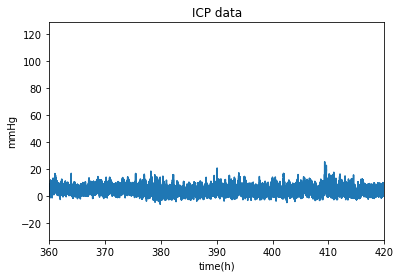

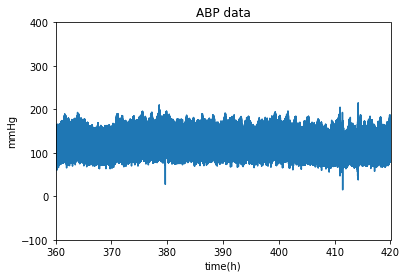

In [9]:
plt.plot(ICP_time/60,ICP_signal)

plt.title('ICP data')
plt.ylabel('mmHg')
plt.xlabel('time(h)')

plt.xlim([time*60,time*60+60])
#plt.ylim([-10,30])

plt.figure()
plt.plot(ABP_time/60,ABP_signal)

plt.title('ABP data')
plt.ylabel('mmHg')
plt.xlabel('time(h)')

plt.xlim([time*60,time*60+60])
plt.ylim([-100,400])

In [10]:
# 5 seconds time scale
time=6 #beginning of the visualisation window in hour

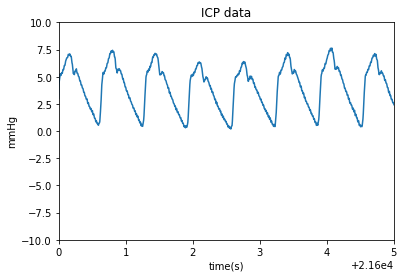

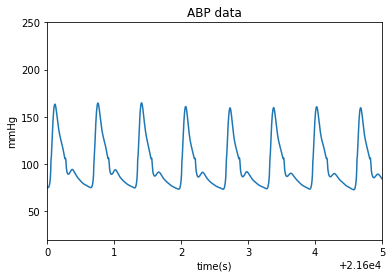

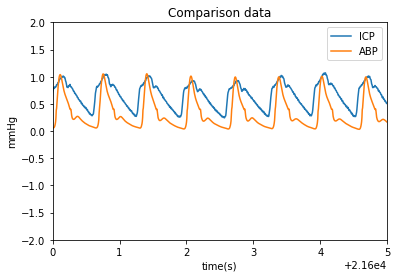

In [11]:
plt.plot(ICP_time,ICP_signal)

plt.title('ICP data')
plt.ylabel('mmHg')
plt.xlabel('time(s)')

plt.xlim([time*60*60,time*60*60+5])
plt.ylim([-10,10])

plt.figure()
plt.plot(ABP_time,ABP_signal)

plt.title('ABP data')
plt.ylabel('mmHg')
plt.xlabel('time(s)')

plt.xlim([time*60*60,time*60*60+5])
plt.ylim([20,250])


plt.figure()
plt.plot(ICP_time,(ICP_signal+2)/9,label='ICP')
plt.plot(ABP_time,(ABP_signal-70)/90, label='ABP')

plt.title('Comparison data')
plt.ylabel('mmHg')
plt.xlabel('time(s)')

plt.xlim([time*60*60,time*60*60+5])
plt.ylim([-2,2])
plt.legend()

### Spectral analysis

Let's visualise signals from our data in frequency domain.

In [12]:
#Signal analysis

from scipy import fftpack
from scipy import signal as sg


#### Periodograms 

Let's plot periodograms of our signals with different method to compare.

(0.0, 10.0)

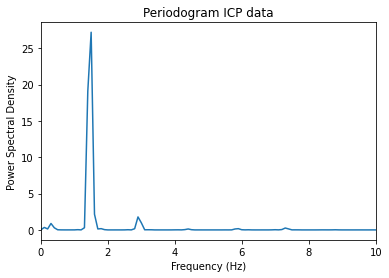

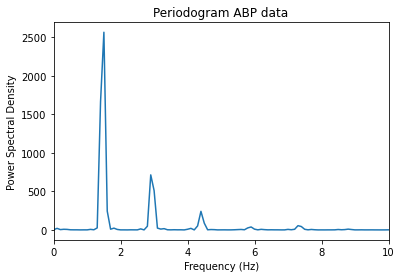

In [13]:
#periodogram with scipy function 

#ICP
plt.figure()
i=da.indexseq(3605,10,ICP_time)
f,Pxx=sg.periodogram(ICP_signal[i],fs,'hanning',None ,scaling='density')
plt.plot(f,Pxx)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('Periodogram ICP data')
plt.xlim([0,10])
#plt.ylim([0.0,100])


#ABP
plt.figure()
i=da.indexseq(3605,10,ABP_time)
f,Pxx=sg.periodogram(ABP_signal[i],fs,'hanning',None ,scaling='density')
plt.plot(f,Pxx)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('Periodogram ABP data')
plt.xlim([0,10])

Text(0.5, 1.0, 'Periodogram ABP data')

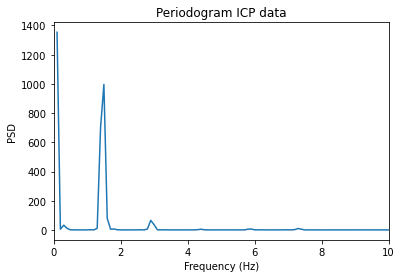

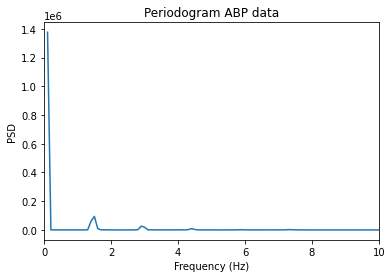

In [14]:
#periodogram (function datanalysis)

#ICP
plt.figure()
i=da.indexseq(3605,10,ICP_time)
freq,power=da.periodogram(ICP_signal[i],ICP_time[i])
da.plot_periodogram(freq,power)
plt.xlim([0,10])
plt.title('Periodogram ICP data')

#ABP
plt.figure()
i=da.indexseq(3605,10,ABP_time)
feq,power=da.periodogram(ABP_signal[i],ABP_time[i])
da.plot_periodogram(freq,power)
plt.xlim([0,10])
plt.title('Periodogram ABP data')

We can see that periodograms are very similar for each signals. And we can also notice in all periodograms the fequency peak related to heart rate between 1 and 2 Hz.

#### Spectrograms

We are going to plot spectrograms of our signals.

(0.0, 5.0)

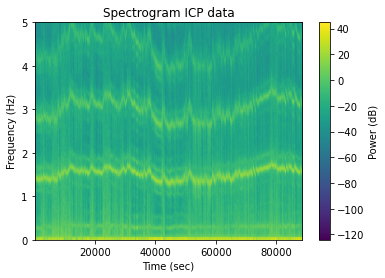

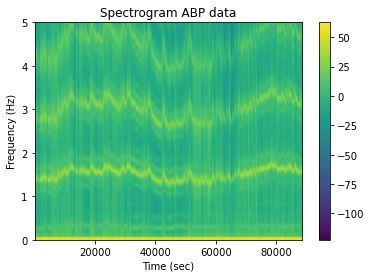

In [15]:
#spectrogram 

#ICP 
plt.figure()
plt.specgram(ICP_signal,NFFT=6000,Fs=fs)
plt.colorbar(label='Power (dB)')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.title('Spectrogram ICP data')
plt.ylim([0,5])


#ABP
plt.figure()
plt.specgram(ABP_signal,NFFT=6000,Fs=fs)
plt.colorbar(label='Power (dB)')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.title('Spectrogram ABP data')
plt.ylim([0,5])

### Visualisation in limited time 

Let's visualize the ICP signal spectrum in selected time [start, start+duration].

(0.01, 100000)

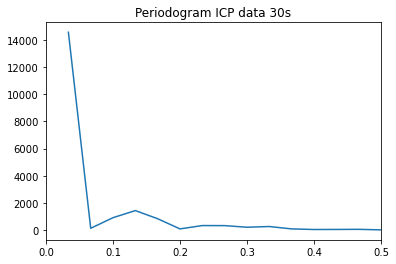

In [16]:
#30 seconds 
#Time selection 
start=8700 #second 
duration=30 #second

indices=da.indexseq(start, duration, ICP_time)
f,Pxx=da.periodogram(ICP_signal[indices],ICP_time[indices])
plt.plot(f,Pxx)
plt.xlim([0,0.5])
plt.title('Periodogram ICP data 30s')

Text(0, 0.5, 'Power (s²)')

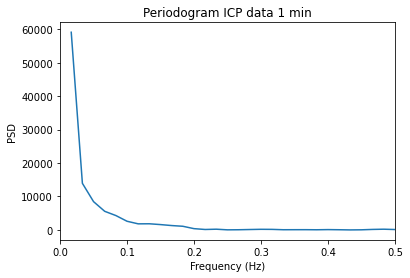

In [17]:
#1 min
#Time selection 
start=7200 #second 
duration=60 #second

indices=da.indexseq(start, duration, ICP_time)

freq,power=da.periodogram(ICP_signal[indices],ICP_time[indices])
da.plot_periodogram(freq,power)
plt.xlim([0,0.5])
plt.title('Periodogram ICP data 1 min')

Text(0, 0.5, 'Power (s²)')

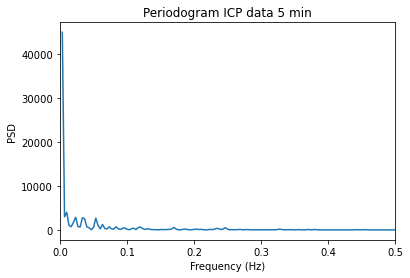

In [18]:
#5 min
#Time selection 
start=7200 #second 
duration=300 #second

indices=da.indexseq(start, duration, ICP_time)

freq,power=da.periodogram(ICP_signal[indices],ICP_time[indices])
da.plot_periodogram(freq,power)
plt.xlim([0,0.5])
#plt.ylim([0,30000])
plt.title('Periodogram ICP data 5 min')

We can see on these periodograms that the peak corresponding to respiratory frequency is really hard to detect.